**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**View files**

In [3]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
txt_fname  = "region.annotation.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.coverage.atac.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.coverage.crispri.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.coverage.fcc_crispri.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.coverage.fcc_starrmpra.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.coverage.fcc.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.cover

## Import data

In [4]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
    txt_fname = "region.annotation.fcc_starrmpra_junke.group.coverage.fcc.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_merge_fcc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 67908    13

$fcc_astarr_macs_input_union
[1] 72928    13



Chrom,ChromStart,ChromEnd,Region,Group,Label,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,778233,779389,chr1:778233-779389,Proximal:Active,Screen,1.5357325,2.4204653,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,778233,779389,chr1:778233-779389,Proximal:Active,Screen,1.1545646,2.8728913,Log2FC,Scale(Log2FC),STARR_WHG_K562_Reddy_A001,WSTARR,WSTARR
chr1,778233,779389,chr1:778233-779389,Proximal:Active,Screen,0.1162065,0.1162065,Mean(ZScore),Mean(ZScore),CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth


**Check: Count table**

In [6]:
lst = lst_dat_region_merge_fcc_import
lst = lapply(lst, function(dat){
    res = table(dat$Group, dat$Assay_Label, dnn=c("Group", "Assay"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tidyr::spread(Region, Freq)
fun_display_table(dat)

Group,Assay,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
Distal:Active,ASTARR,10578,11362
Distal:Active,CRISPRi-Growth,8322,8415
Distal:Active,CRISPRi-HCRFF,135,147
Distal:Active,LMPRA,9151,9522
Distal:Active,TMPRA,235,277
Distal:Active,WSTARR,10556,11348
Distal:Repressive,ASTARR,1364,2407
Distal:Repressive,CRISPRi-Growth,745,978
Distal:Repressive,CRISPRi-HCRFF,12,15
Distal:Repressive,LMPRA,627,810


In [7]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
    txt_fname  = "region.annotation.fcc_starrmpra_junke.group.coverage.crispri.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_merge_crispri_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 15460    13

$fcc_astarr_macs_input_union
[1] 15847    13



Chrom,ChromStart,ChromEnd,Region,Group,Label,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,4092109,4092511,chr11:4092109-4092511,Distal:Active,Screen:NotSignif,-0.12943640,-0.12943640,Mean(ZScore),Mean(ZScore),CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF
chr11,4094223,4095304,chr11:4094223-4095304,Proximal:Active,Screen:NotSignif,-0.04849565,-0.04849565,Mean(ZScore),Mean(ZScore),CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF
chr11,4393045,4394087,chr11:4393045-4394087,Proximal:Active,Screen:NotSignif,-0.08214896,-0.08214896,Mean(ZScore),Mean(ZScore),CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF


In [20]:
lst = lst_dat_region_merge_crispri_import
lst = lapply(lst, function(dat){
    res = table(dat$Assay_Label, dnn=c("Assay"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tidyr::spread(Region, Freq)
fun_display_table(dat)

Assay,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
CRISPRi-Growth,15240,15611
CRISPRi-HCRFF,220,236


In [21]:
lst = lst_dat_region_merge_crispri_import
lst = lapply(lst, function(dat){
    res = table(dat$Assay_Label, dat$Label, dnn=c("Assay", "Label"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tidyr::spread(Region, Freq)
fun_display_table(dat)

Assay,Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
CRISPRi-Growth,Screen:NotSignif,13761,14094
CRISPRi-Growth,Screen:Signif,1479,1517
CRISPRi-HCRFF,Screen:NotSignif,190,207
CRISPRi-HCRFF,Screen:Signif,30,29


In [8]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_merge_fcc_import
dat = lst[[idx]]

dat_region_merge_fcc = dat

In [9]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_merge_crispri_import
dat = lst[[idx]]

dat_region_merge_crispri = dat

## Set plot style

In [10]:
### set text size
theme_text = theme(
    title        = element_text(size = 16),
    axis.title   = element_text(size = 16),
    axis.text    = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text  = element_text(size = 16)
)

In [11]:
dat = tribble(
    ~Group,                 ~Color,
    "Proximal:Active",      "#e41a1c", 
    "Distal:Active",        "#ff7f00",
    "Distal:Repressive",    "#377eb8",
    "Proximal:Repressive",  "#4daf4a", #"#f781bf",
    "Distal:Inactive",      "#bdbdbd",
    "Proximal:Inactive",    "#252525"
)
dat_annot_color = dat
vec_txt_color = setNames(dat$Color, dat$Group)
lst_txt_color = split(dat$Color, dat$Group)
theme_color   = scale_fill_manual(values=vec_txt_color)

## Explore: FCC Score distribution across group

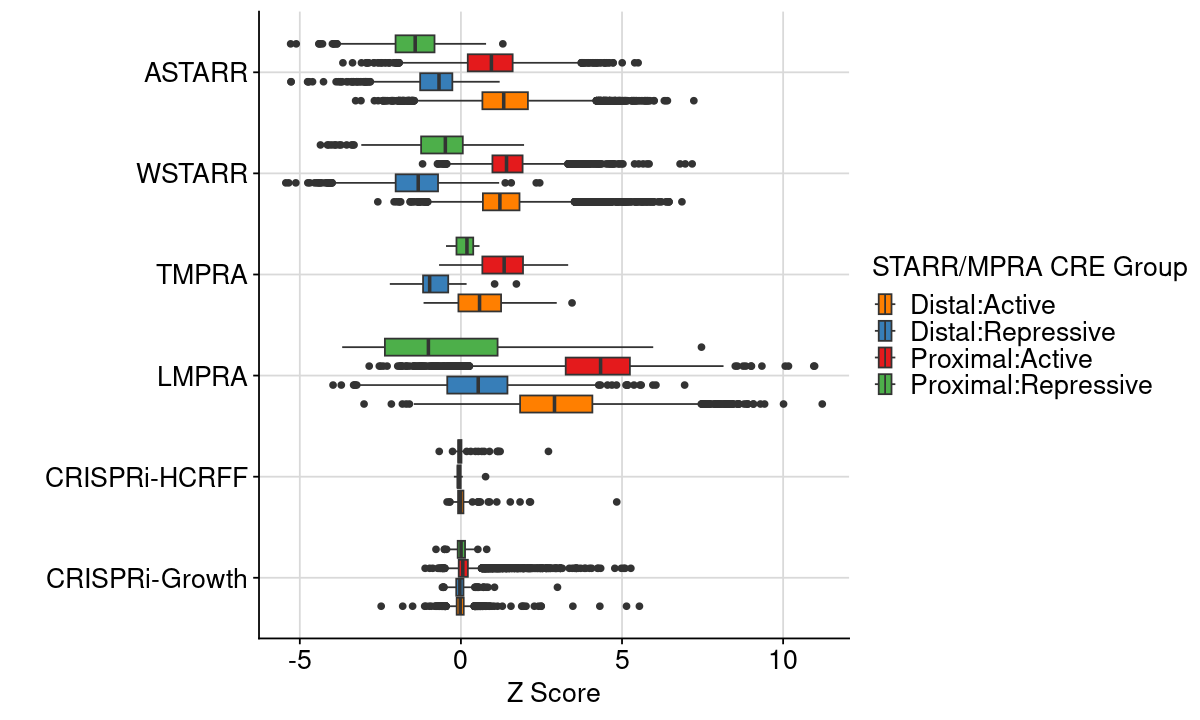

In [12]:
###
vec_txt_assay = c(
    "ASTARR", "WSTARR", 
    "TMPRA", "LMPRA", 
    "CRISPRi-HCRFF", 
    "CRISPRi-Growth"
)

###
dat = dat_region_merge_fcc
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec_txt_assay)))

###
gpt = ggplot(dat, aes(x=Zcore, y=Assay_Label, fill=Group)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "", fill = "STARR/MPRA CRE Group") +
    theme_cowplot() +
    background_grid() +
    theme_color +
    theme_text

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

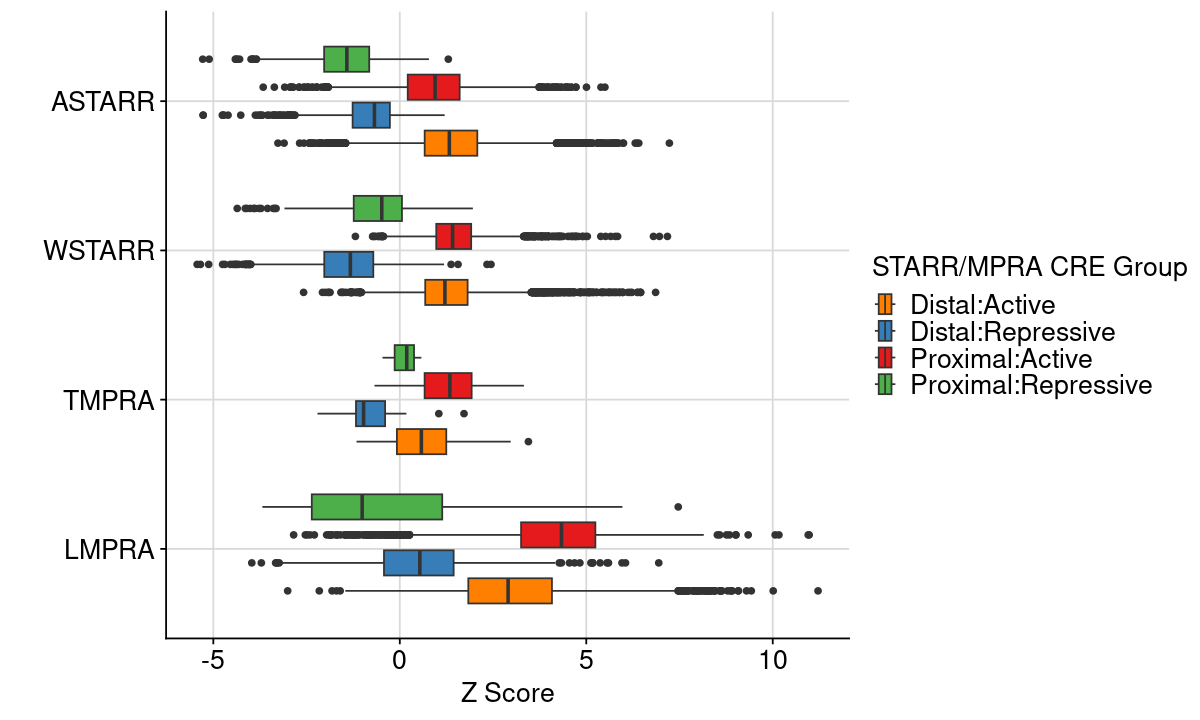

In [16]:
###
vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")

###
dat = dat_region_merge_fcc
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec_txt_assay)))

###
gpt = ggplot(dat, aes(x=Zcore, y=Assay_Label, fill=Group)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "", fill = "STARR/MPRA CRE Group") +
    theme_cowplot() +
    background_grid() +
    theme_color +
    theme_text

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

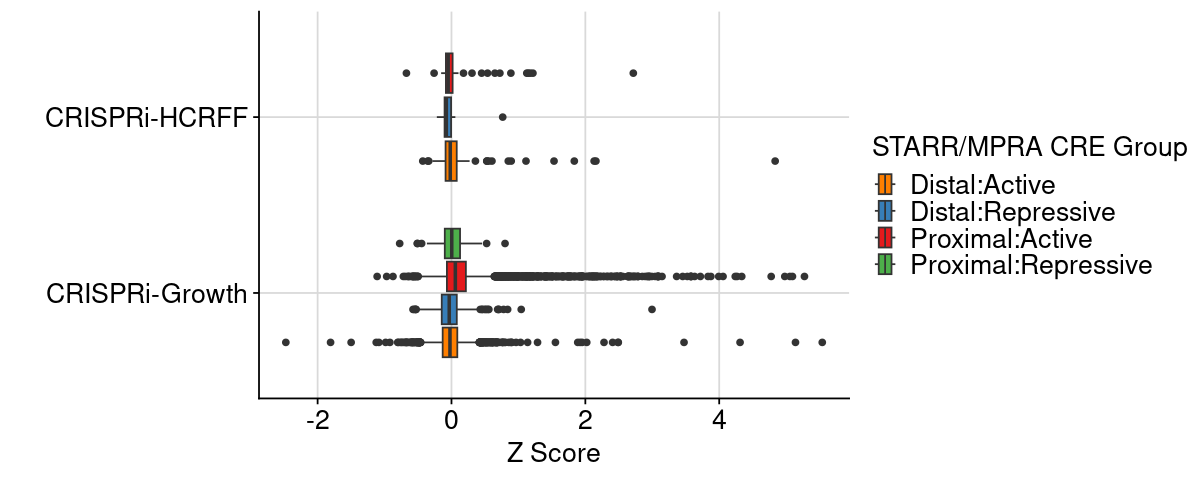

In [19]:
###
vec_txt_assay = c(
    "CRISPRi-HCRFF", 
    "CRISPRi-Growth"
)

###
dat = dat_region_merge_fcc
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec_txt_assay)))

###
gpt = ggplot(dat, aes(x=Zcore, y=Assay_Label, fill=Group)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "", fill = "STARR/MPRA CRE Group") +
    theme_cowplot() +
    background_grid() +
    theme_color +
    theme_text

options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

## Explore: CRSIRPi Score distribution across group

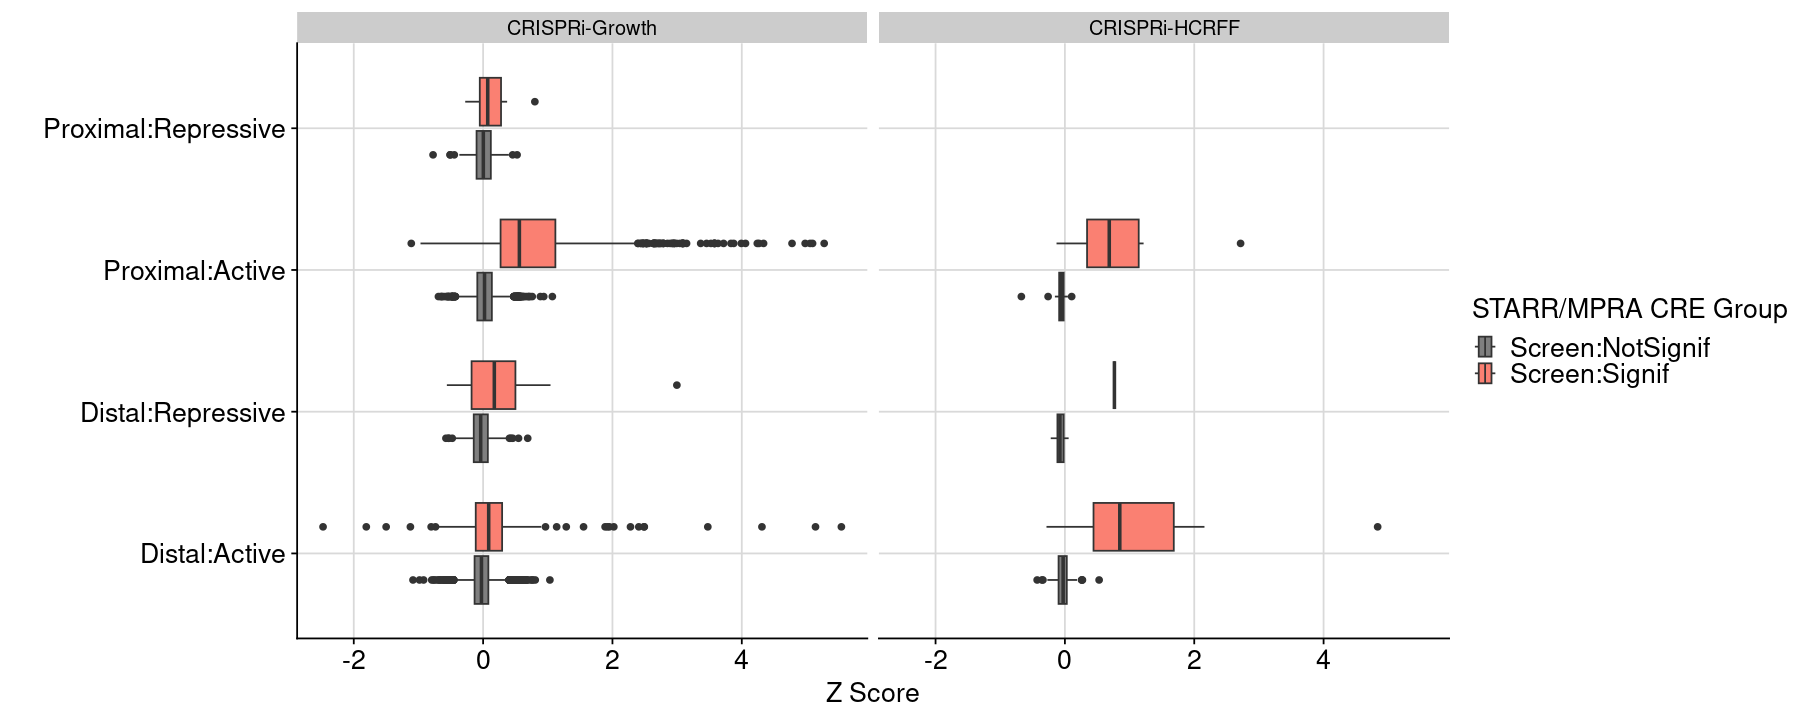

In [29]:
###
vec_txt_assay = c(
    "CRISPRi-HCRFF", 
    "CRISPRi-Growth"
)

###
dat = dat_region_merge_crispri
dat = dat %>% 
    #dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    #dplyr::filter(Label == "Screen:Signif") %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec_txt_assay))) 

###
gpt = ggplot(dat, aes(x=Zcore, y=Group, fill=Label)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "", fill = "STARR/MPRA CRE Group") +
    theme_cowplot() +
    background_grid() +
    scale_fill_manual(values=c("Screen:Signif" = "salmon", "Screen:NotSignif" = "grey50")) +
    theme_text+
    facet_wrap(~Assay_Label)

options(repr.plot.height=6, repr.plot.width=15)
print(gpt)

In [ ]:
###
vec_txt_assay = c(
    "CRISPRi-HCRFF", 
    "CRISPRi-Growth"
)

###
dat = dat_region_merge_crispri
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Label == "Screen:Signif") %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec_txt_assay)))

###
gpt = ggplot(dat, aes(x=Zcore, y=Assay_Label, fill=Group)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "", fill = "STARR/MPRA CRE Group") +
    theme_cowplot() +
    background_grid() +
    theme_color +
    theme_text

options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

## Export plot

Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_boxplot()`).”


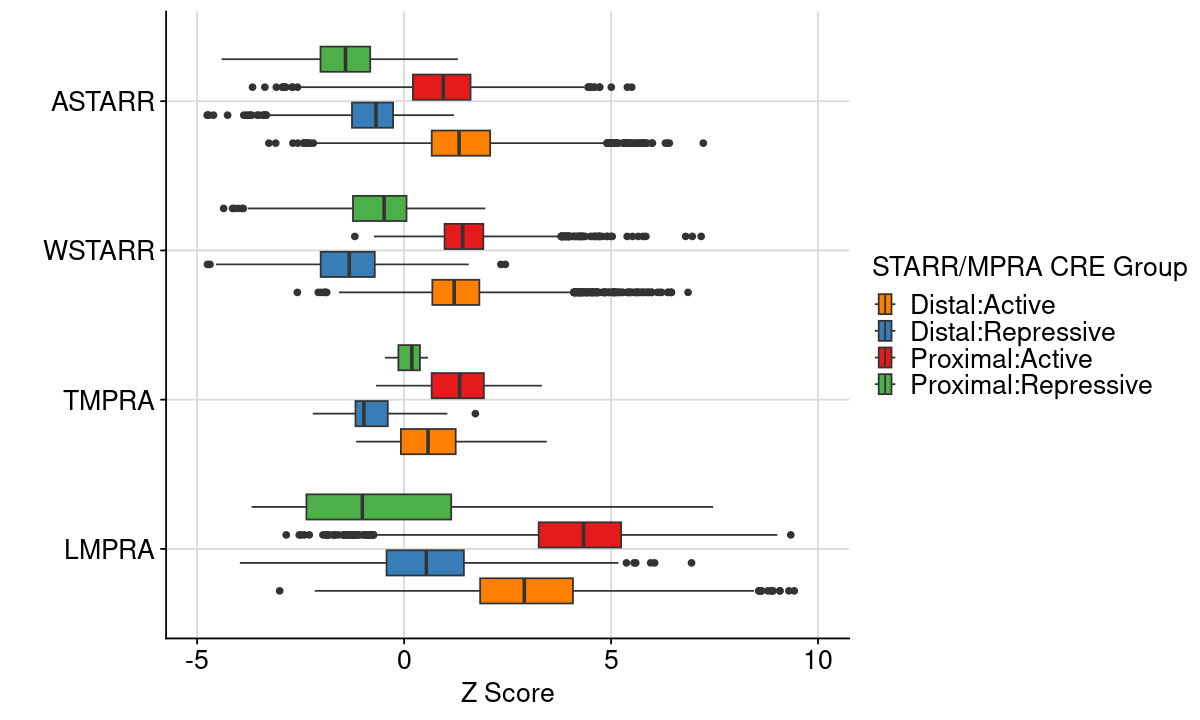

In [40]:
###
vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")

###
dat = dat_region_merge_fcc
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec_txt_assay)))

###
gpt = ggplot(dat, aes(x=Zcore, y=Assay_Label, fill=Group)) +
    geom_boxplot(coef = 2) +
    labs(x = "Z Score", y = "", fill = "STARR/MPRA CRE Group") +
    theme_cowplot() +
    background_grid() +
    theme_color +
    theme_text +
    xlim(-5, 10)

gpt_export_starrmpra = gpt
options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

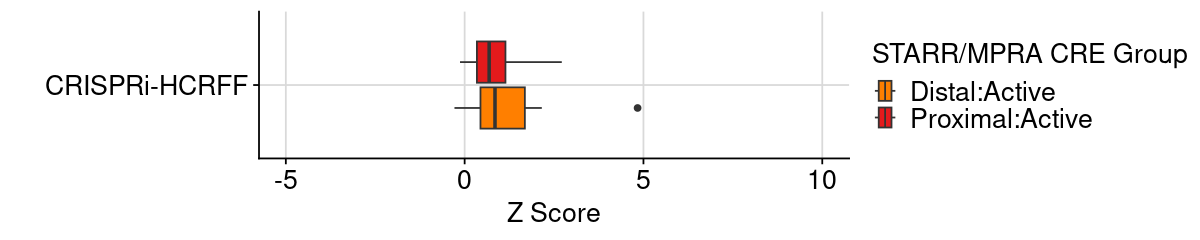

In [53]:
###
txt_assay = "CRISPRi-HCRFF"

###
dat = dat_region_merge_crispri
dat = dat %>% 
    dplyr::filter(Assay_Label == txt_assay) %>%
    dplyr::filter(Label == "Screen:Signif") %>%
    dplyr::filter(str_detect(Group, "Active"))

###
gpt = ggplot(dat, aes(x=Zcore, y=Assay_Label, fill=Group)) +
    geom_boxplot(coef = 2) +
    labs(x = "Z Score", y = "", fill = "STARR/MPRA CRE Group") +
    theme_cowplot() +
    background_grid() +
    theme_color +
    theme_text +
    xlim(-5, 10)

gpt_export_crispri_hcrff = gpt
options(repr.plot.height=2, repr.plot.width=10)
print(gpt)

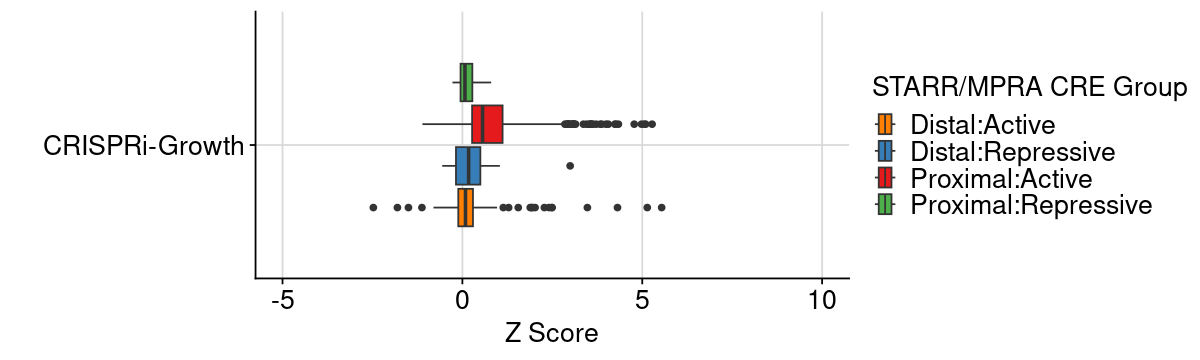

In [54]:
###
txt_assay = "CRISPRi-Growth"

###
dat = dat_region_merge_crispri
dat = dat %>% 
    dplyr::filter(Assay_Label == txt_assay) %>%
    dplyr::filter(Label == "Screen:Signif") 

###
gpt = ggplot(dat, aes(x=Zcore, y=Assay_Label, fill=Group)) +
    geom_boxplot(coef = 2) +
    labs(x = "Z Score", y = "", fill = "STARR/MPRA CRE Group") +
    theme_cowplot() +
    background_grid() +
    theme_color +
    theme_text +
    xlim(-5, 10)

gpt_export_crispri_growth = gpt
options(repr.plot.height=3, repr.plot.width=10)
print(gpt)

Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_boxplot()`).”


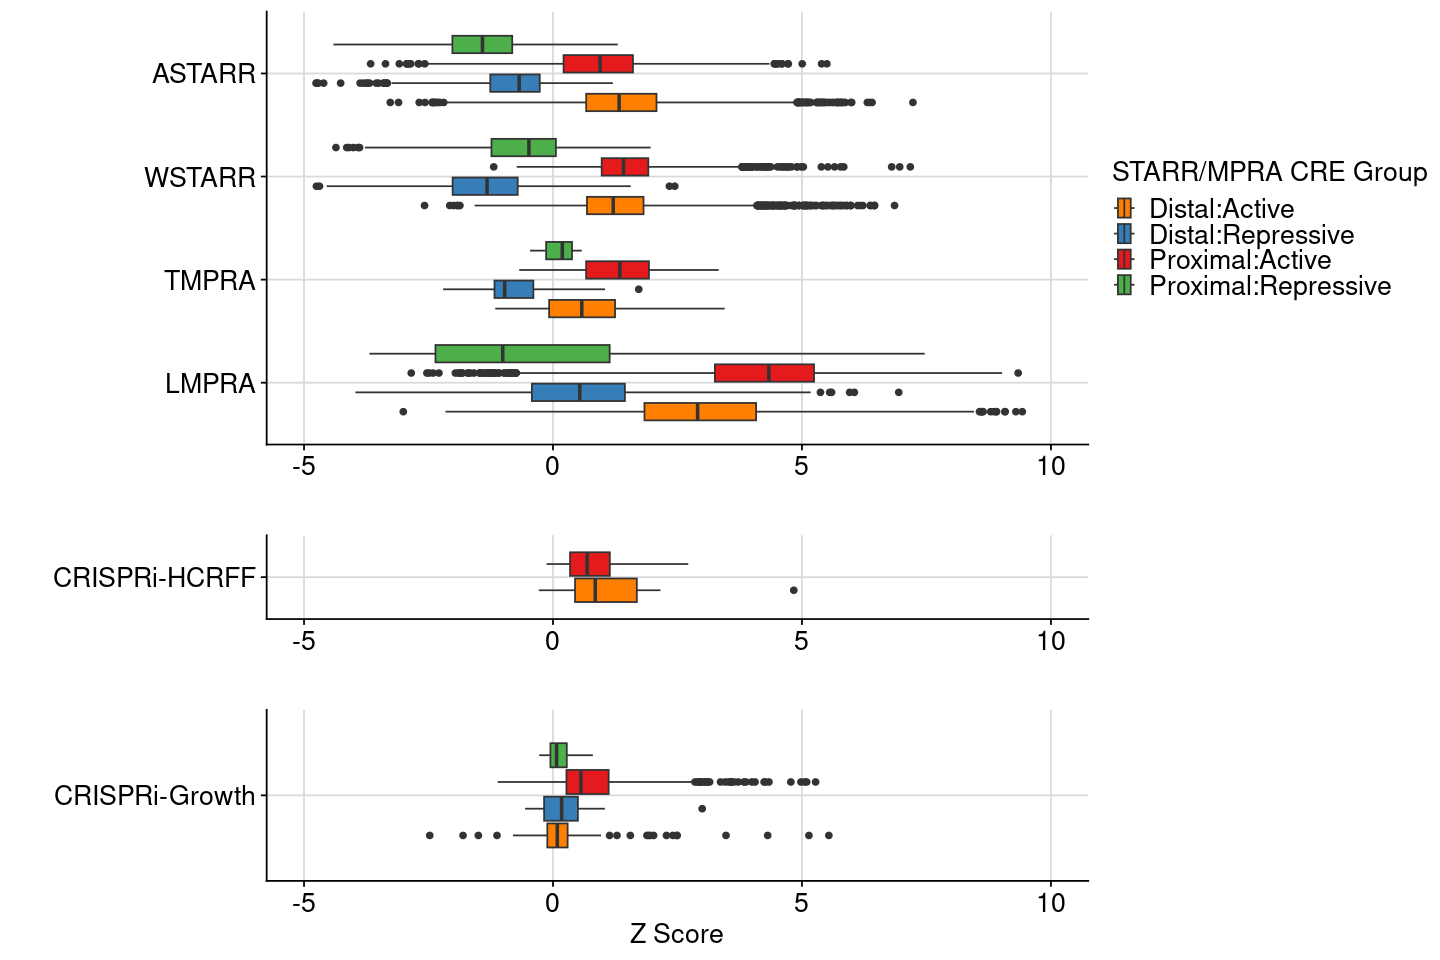

In [56]:
theme_legend = theme(legend.position = "none")
lst = list(
    gpt_export_starrmpra      + labs(x = ""),
    gpt_export_crispri_hcrff  + labs(x = "") + theme_legend,
    gpt_export_crispri_growth + theme_legend
)

vec = c(3, 1, 1.5)
plt = plot_grid(
    plotlist = lst,
    rel_heights = vec,
    align = "v",
    ncol = 1
)

options(repr.plot.height=8, repr.plot.width=12)
print(plt)